<a href="https://colab.research.google.com/github/AvantiShri/colab_notebooks/blob/master/modisco/figureoutdensityadapt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y modisco
%cd /content/
!rm -rf tfmodisco
!git clone https://github.com/kundajelab/tfmodisco.git
%cd /content/tfmodisco
#!git checkout exposition
!git checkout exposition
!git log -1
!pip install .
%cd /content/

from importlib import reload
%load_ext autoreload
%autoreload 2

import modisco
reload(modisco)

/content
Cloning into 'tfmodisco'...
remote: Enumerating objects: 5910, done.
remote: Counting objects: 100% (536/536), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 5910 (delta 330), reused 521 (delta 323), pack-reused 5374
Receiving objects: 100% (5910/5910), 246.29 MiB | 12.30 MiB/s, done.
Resolving deltas: 100% (3677/3677), done.
/content/tfmodisco
Branch 'exposition' set up to track remote branch 'exposition' from 'origin'.
Switched to a new branch 'exposition'
commit 762a5cc787d7dda8d230460e7b17368fb9d59ff6 (HEAD -> exposition, origin/exposition)
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Wed Oct 6 16:48:13 2021 -0700

    name fix
Processing /content/tfmodisco
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 53.2 MB/s eta 0:00:00
  Created wheel for modisco: filename=modisco-0.5.15.0-py3-none-any.whl size=232386 s

<module 'modisco' from '/usr/local/lib/python3.10/dist-packages/modisco/__init__.py'>

In [2]:
!pip uninstall -y simdna
%cd /content/
!rm -rf simdna
!git clone https://github.com/kundajelab/simdna.git
%cd /content/simdna
!git checkout dev
!git log -1
!pip install .
%cd /content/

from importlib import reload
%load_ext autoreload
%autoreload 2

/content
Cloning into 'simdna'...
remote: Enumerating objects: 1237, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 1237 (delta 57), reused 49 (delta 49), pack-reused 1172
Receiving objects: 100% (1237/1237), 3.94 MiB | 16.45 MiB/s, done.
Resolving deltas: 100% (744/744), done.
/content/simdna
Branch 'dev' set up to track remote branch 'dev' from 'origin'.
Switched to a new branch 'dev'
commit e8488eba5eae123bc798bcbbdbc580497352608b (HEAD -> dev, origin/dev)
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Wed Sep 29 17:20:03 2021 -0700

    super fix
Processing /content/simdna
  Preparing metadata (setup.py) ... done
  Created wheel for simdna: filename=simdna-0.5.0.0-py3-none-any.whl size=643794 sha256=928d718b82b2f4a8ed341decfc899af9b33045b09e8e3e08e1fe380a13d37384
  Stored in directory: /tmp/pip-ephem-wheel-cache-scdyq0go/wheels/72/26/9f/77d81351d437d7eb1326e830fa3d3a0ac57229e8190c528fdf
Successfully buil

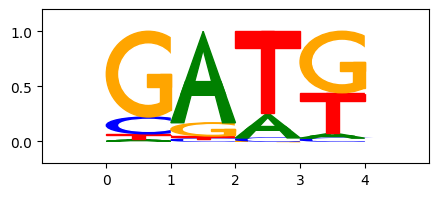

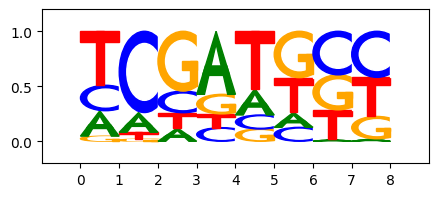

In [3]:
#motifs of varying lengths
#and of varying frequencies

import numpy as np
import modisco
from modisco.visualization import viz_sequence

rng = np.random.RandomState(1234)

def generate_ppm(rng, length, alpha):
    return rng.dirichlet(alpha*np.ones(4), size=length)

def gen_motif_with_diff_flanks(rng, core_len, core_alpha,
                                    flank_len, flank_alpha):
  motifcore = generate_ppm(rng, length=core_len, alpha=0.5)
  motifa = np.concatenate([
              generate_ppm(rng, length=flank_len, alpha=flank_alpha),
                motifcore,
              generate_ppm(rng, length=flank_len, alpha=flank_alpha)])
  motifb = np.concatenate([
              generate_ppm(rng, length=flank_len, alpha=flank_alpha),
                motifcore,
              generate_ppm(rng, length=flank_len, alpha=flank_alpha)])
  return motifa, motifb

def gen_motif_with_lower_ic_and_diff_flanks(rng, core_len, core_alpha, flank_len,
                                            flank_alpha, core_pc):
  motif_core = generate_ppm(rng, length=core_len, alpha=core_alpha)
  degraded_core = (motif_core +
                   np.array([core_pc, core_pc,
                             core_pc, core_pc])[None,:])/(1.0 + core_pc*4)
  motifa = np.concatenate([
              generate_ppm(rng, length=flank_len, alpha=flank_alpha),
                degraded_core,
              generate_ppm(rng, length=flank_len, alpha=flank_alpha)])
  return motif_core, motifa

#motif1a, motif1b = gen_motif_with_diff_flanks(
#                      rng=rng, core_len=5,
#                      core_alpha=0.5, flank_len=3, flank_alpha=2.0)
#viz_sequence.plot_weights(motif1a)
#viz_sequence.plot_weights(motif1b)


motif2a, motif2b = gen_motif_with_lower_ic_and_diff_flanks(
                      rng=rng, core_len=4,
                      core_alpha=0.4, flank_len=2, flank_alpha=1.0,
                      core_pc=0.2) #core_pc is 'core_pseudocount'

viz_sequence.plot_weights(motif2a, figsize=(5,2))
viz_sequence.plot_weights(motif2b, figsize=(5,2))

"""motif3 = np.concatenate([generate_ppm(rng, length=3, alpha=2.0),
                         generate_ppm(rng, length=9, alpha=0.5),
                         generate_ppm(rng, length=3, alpha=2.0)])
viz_sequence.plot_weights(motif3)

motif4 = np.concatenate([generate_ppm(rng, length=2, alpha=2.0),
                         generate_ppm(rng, length=11, alpha=0.7),
                         generate_ppm(rng, length=2, alpha=2.0)])
viz_sequence.plot_weights(motif4)

motif5 = np.concatenate([generate_ppm(rng, length=1, alpha=2.0),
                         generate_ppm(rng, length=13, alpha=0.7),
                         generate_ppm(rng, length=1, alpha=2.0)])
viz_sequence.plot_weights(motif5)

motif6 = np.concatenate([generate_ppm(rng, length=5, alpha=0.5),
                         generate_ppm(rng, length=5, alpha=2.0),
                         generate_ppm(rng, length=5, alpha=0.5)])
viz_sequence.plot_weights(motif6)"""


motifs = [motif2a, motif2b]
#motifs = [motif1a, motif1b, motif2a, motif2b]#, motif3, motif4, motif5, motif6]

In [4]:
#generate simulate sequences
from importlib import reload
import simdna
reload(simdna.synthetic.substringgen)
#reload(simdna.synthetic.embedders)
from simdna.simdnautil.pwm import PWM
import simdna.synthetic as sn
import simdna

import numpy as np
np.random.seed(1234)
from simdna import random
random.seed(1234)

bgsimulator = sn.EmbedInABackground(
    backgroundGenerator=sn.ZeroOrderBackgroundGenerator(
        seqLength=100,
        discreteDistribution={'A':0.27, 'C':0.23, 'G':0.23, 'T': 0.27}),
        embedders=[])

sn.print_sequences(
    outputFileName="bgsim1.simdna",
    sequenceSetGenerator=sn.GenerateSequenceNTimes(bgsimulator, N=1000),
    includeEmbeddings=True)

sn.print_sequences(
    outputFileName="bgsim2.simdna",
    sequenceSetGenerator=sn.GenerateSequenceNTimes(bgsimulator, N=100),
    includeEmbeddings=True)

In [5]:
#simdata = sn.read_simdata_file("mysim.simdna")
#bgdata = sn.read_simdata_file("bgsim.simdna")

bgdata1 = sn.read_simdata_file("bgsim1.simdna")
bgdata2 = sn.read_simdata_file("bgsim2.simdna")

In [6]:
#seqs = simdata.sequences

#one-hot encode the seqs
import numpy as np
lookup = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1]}
def onehotencode_seqs(seqs):
  to_return = []
  for seq in seqs:
    to_return.append([lookup[letter] for letter in seq])
  return np.array(to_return)

#fg_onehot_seqs = onehotencode_seqs(simdata.sequences)
#bg_onehot_seqs = onehotencode_seqs(bgdata.sequences)

bg1_onehot_seqs = onehotencode_seqs(bgdata1.sequences)
bg2_onehot_seqs = onehotencode_seqs(bgdata2.sequences)

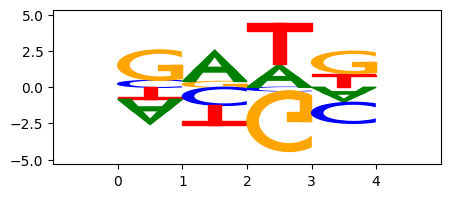

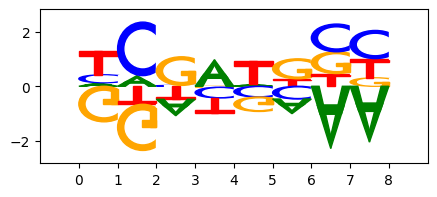

In [7]:
#score each sequence with the log-odds matrix of each pfm
background = np.array([0.27, 0.23, 0.23, 0.27])
pwms = [np.log(motif/background) for motif in motifs]
for pwm in pwms:
  viz_sequence.plot_weights(pwm - np.mean(pwm, axis=-1)[:,None], figsize=(5,2))

In [8]:
#scan each sequence with the rolling window sums.
import modisco
import numpy as np
import scipy
from collections import namedtuple


PwmHit = namedtuple("PwmHit", ["seq_idx", "pwm_start", "pwm_end", "which_pwm",
                                         "logodds_score"])


def get_pwm_hits_for_seq(seq_pwm_axis_argmax, seq_pwm_axis_maxlogodds,
                         pwm_offsets, pwm_lengths, competition_window,
                         seq_idx):
    #Greedily decide which motifs get to bind
    #Pwm offsets should be the left padding that was applied to the logodds
    # scores for that particular pwm (depends on the pwm length)
    #seq_idx just to insert into the hit
    maxlogodds_copy = np.copy(seq_pwm_axis_maxlogodds)
    sorted_positions = np.argsort(-maxlogodds_copy)

    pwm_hits = []
    for pos in sorted_positions:
        logodds_score = maxlogodds_copy[pos]
        if (logodds_score <= 0): #avoid 'less likely than bg' hits for this sim
            continue
        which_pwm = seq_pwm_axis_argmax[pos]
        #we want pwm_hits to represent the pwm start, hence the subtraction
        # of pwm_offsets
        pwm_start = pos-pwm_offsets[which_pwm]
        pwm_hits.append(PwmHit(seq_idx=seq_idx,
                               pwm_start=pwm_start,
                               pwm_end=pwm_start+pwm_lengths[which_pwm],
                               which_pwm=which_pwm,
                               logodds_score=logodds_score))
        clearance_start = pos - int(competition_window/2.0)
        clearance_end = clearance_start + competition_window
        maxlogodds_copy[clearance_start:clearance_end] = 0
    return pwm_hits


def scan_sequences(onehot_seqs, pwms):
  logodds_scans = []
  #pwm_scans = []
  for pwm in pwms:
    logodds_scans.append(modisco.util.compute_pwm_scan(onehot_seq=onehot_seqs,
                                                       weightmat=pwm))
    #pwm_scans.append( np.exp(expfactor*scipy.special.expit(logodds_scans[-1]+mu)) )
  return logodds_scans#, pwm_scans


def get_competitive_pwm_hits(onehot_seqs, pwms, competition_window):
    #Scan the sequences for logodds. Then:
    # (1) simulate competitive binding, in that only one motif is allowed to bind
    # in a window of length "competition_window" (centered at the motif)
    # (2) Decide which motif gets to bind greedily.

    logodds_scans = scan_sequences(onehot_seqs=onehot_seqs, pwms=pwms)
    pwm_lengths = [len(x) for x in pwms]

    #When a sequences is scanned,
    # the length of the result is orig_len-(windowlen-1). So we distribute
    # (windowlen-1) evenly on either side to make up for it.
    padded_logodds_scans = []
    pwm_offsets = [] #record the left-padding applied
    for (logodds_scan, pwm_len) in zip(logodds_scans, pwm_lengths):
      pwm_offset = int((pwm_len-1)/2.0)
      pwm_offsets.append(pwm_offset)
      padded_logodds_scans.append(
          np.pad(np.array(logodds_scan), (
            (0,0), (pwm_offset, (pwm_len-1)-pwm_offset )))
      )
    #assert that after padding they are all the same length. This will also make
    # the scores represent the score at the center of the pwm hit rather than
    # at the start.
    assert len(set(x.shape[1] for x in padded_logodds_scans)) == 1
    #make them all one numpy array so we can take an argmax over the pwm axis
    padded_logodds_scans = np.array(padded_logodds_scans)
    pwm_axis_argmax = np.argmax(padded_logodds_scans, axis=0)
    pwm_axis_maxlogodds = np.max(padded_logodds_scans, axis=0)
    allseq_pwm_hits = [
      get_pwm_hits_for_seq(seq_pwm_axis_argmax, seq_pwm_axis_maxlogodds,
                           pwm_offsets=pwm_offsets, pwm_lengths=pwm_lengths,
                           competition_window=competition_window,
                           seq_idx=seq_idx)
      for (seq_idx, (seq_pwm_axis_argmax, seq_pwm_axis_maxlogodds)) in
      enumerate(zip(pwm_axis_argmax, pwm_axis_maxlogodds))
    ]

    #reorganize to be pwm-to-hits
    pwm_to_hits = [[] for pwm in pwms]
    for seq_idx, pwm_hits_for_seq in enumerate(allseq_pwm_hits):
      for pwm_hit in pwm_hits_for_seq:
        pwm_to_hits[pwm_hit.which_pwm].append(pwm_hit)

    return allseq_pwm_hits, pwm_to_hits


COMPETITION_WINDOW = max([len(x) for x in pwms])

#(fg_allseq_pwm_hits, fg_pwm_to_hits) = get_competitive_pwm_hits(
#    onehot_seqs=fg_onehot_seqs, pwms=pwms,
#    competition_window=COMPETITION_WINDOW)
(bg1_allseq_pwm_hits, bg1_pwm_to_hits) = get_competitive_pwm_hits(
    onehot_seqs=bg1_onehot_seqs, pwms=pwms,
    competition_window=COMPETITION_WINDOW)
(bg2_allseq_pwm_hits, bg2_pwm_to_hits) = get_competitive_pwm_hits(
    onehot_seqs=bg2_onehot_seqs, pwms=pwms,
    competition_window=COMPETITION_WINDOW)

#print("sumscore hits in fg")
#print([np.sum([y.logodds_score for y in x]) for x in fg_pwm_to_hits])

print("sumscore hits in bg1")
print([np.sum([y.logodds_score for y in x]) for x in bg1_pwm_to_hits])

print("sumscore hits in bg2")
print([np.sum([y.logodds_score for y in x]) for x in bg2_pwm_to_hits])

#for logodds_scan in fg_logodds_scans:
#  print(np.sum(logodds_scan+mu > 0)) #instances of "positive" hits
#print("hits in bg")
#for logodds_scan in bg_logodds_scans:
#  print(np.sum(logodds_scan+mu > 0)) #instances of "positive" hits

sumscore hits in bg1
[10054.405607554752, 10792.005805906036]
sumscore hits in bg2
[1024.9449794009074, 1108.7004204226305]


In [9]:

def logodds_to_score(logodds):
  MU = -4
  EXPFACTOR = 3
  #return logodds
  #return scipy.special.expit(logodds+MU)
  return np.exp(EXPFACTOR*scipy.special.expit(logodds+MU))

def find_imp(onehot_seqs, allseq_pwm_hits, pwms):
    ref = logodds_to_score(0)
    simulated_hyp_scores = np.zeros_like(onehot_seqs, dtype="float64")
    for row_idx in range(len(allseq_pwm_hits)):
      for pwm_hit in allseq_pwm_hits[row_idx]:
        assert pwm_hit.seq_idx==row_idx
        score = logodds_to_score(pwm_hit.logodds_score)
        diff_from_ref = score-ref
        assert np.sign(diff_from_ref)==np.sign(pwm_hit.logodds_score)
        scalefactor = diff_from_ref/pwm_hit.logodds_score
        simulated_hyp_scores[row_idx][
            pwm_hit.pwm_start:pwm_hit.pwm_end]\
                += pwms[pwm_hit.which_pwm]*scalefactor
    simulated_actual_scores = simulated_hyp_scores*onehot_seqs
    return simulated_hyp_scores, simulated_actual_scores

"""fg_hyp_scores, fg_actual_scores = find_imp(onehot_seqs=fg_onehot_seqs,
                                           allseq_pwm_hits=fg_allseq_pwm_hits,
                                           pwms=pwms)"""

bg1_hyp_scores, bg1_actual_scores = find_imp(onehot_seqs=bg1_onehot_seqs,
                                           allseq_pwm_hits=bg1_allseq_pwm_hits,
                                           pwms=pwms)

bg2_hyp_scores, bg2_actual_scores = find_imp(onehot_seqs=bg2_onehot_seqs,
                                           allseq_pwm_hits=bg2_allseq_pwm_hits,
                                           pwms=pwms)

bg


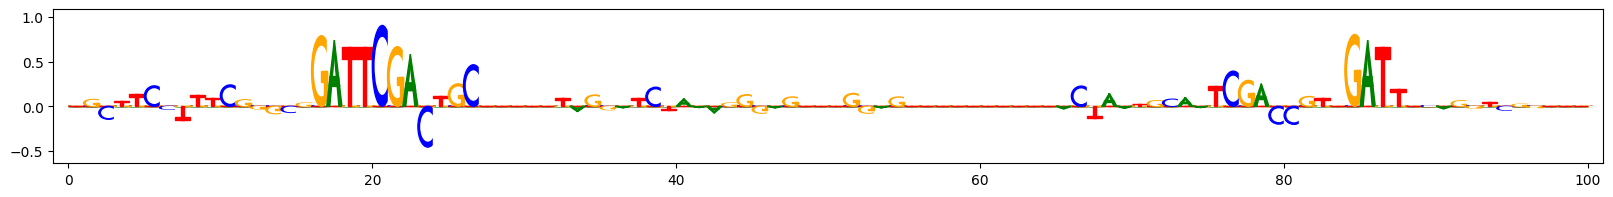

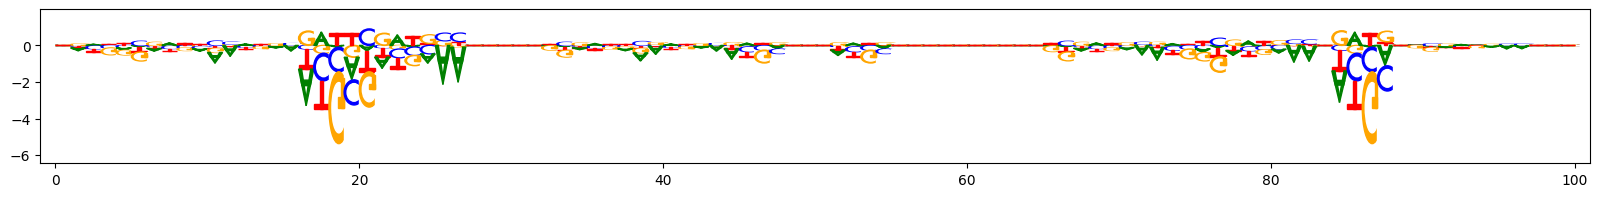

bg


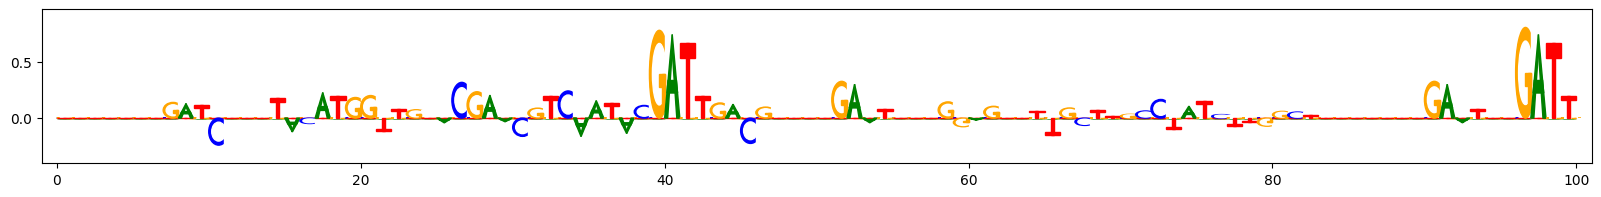

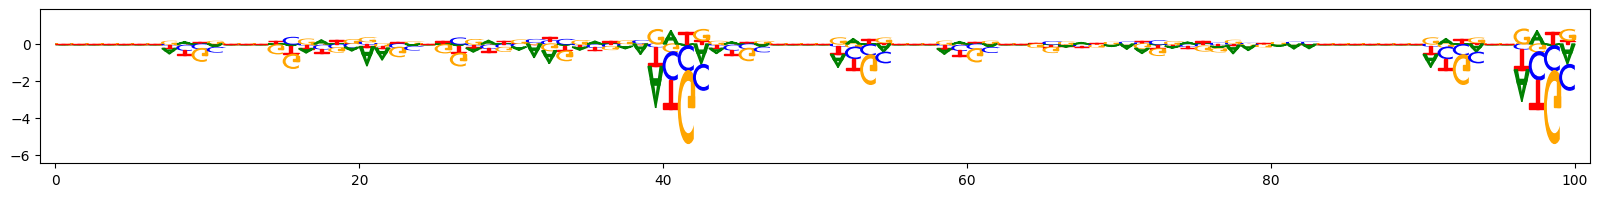

In [10]:
from modisco.visualization import viz_sequence

for i in range(2):
  print("bg")
  viz_sequence.plot_weights(bg1_actual_scores[i], subticks_frequency=20)
  viz_sequence.plot_weights(bg1_hyp_scores[i], subticks_frequency=20)
  #print("bg")
  #viz_sequence.plot_weights(bg_actual_scores[i], subticks_frequency=20)
  #viz_sequence.plot_weights(bg_hyp_scores[i], subticks_frequency=20)

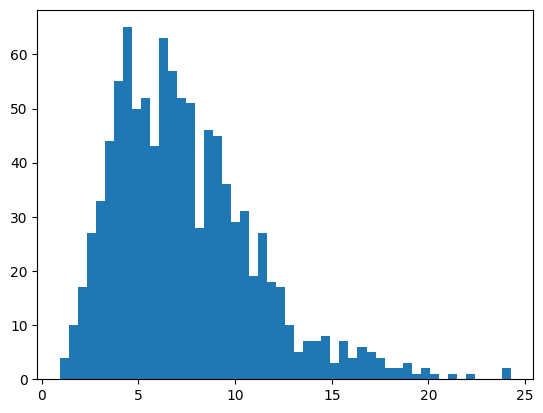

In [11]:
from matplotlib import pyplot as plt
plt.hist(np.sum(bg1_actual_scores, axis=(1,2)), bins=50)
plt.show()

MEMORY 0.21932032
On task task0
Computing windowed sums on original
Generating null dist
peak(mu)= -3.4258965253526966e-06
Computing threshold
For increasing = True , the minimum IR precision was 0.44320693774931635 occurring at 0.0 implying a frac_neg of 0.7959993897154063
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.4366453456571001 occurring at -0.00011777931556089527 implying a frac_neg of 0.7750807458339113
To be conservative, adjusted frac neg is 0.95
Thresholds from null dist were -0.22700299885679015  and  2.091527915206387 with frac passing 0.1165934065934066
Final raw thresholds are -0.22700299885679015  and  2.091527915206387
Final transformed thresholds are -0.35505494505494506  and  0.8848351648351649


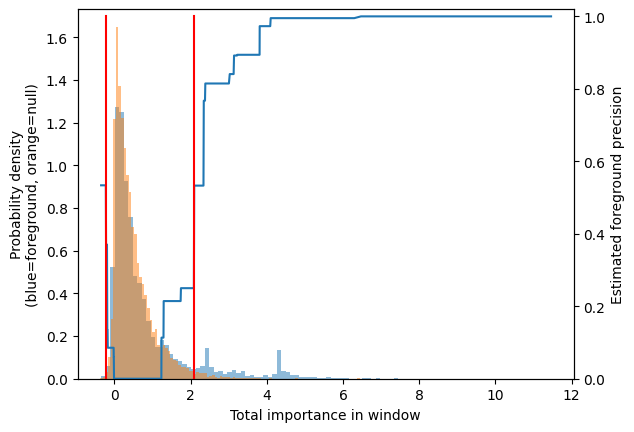

Got 216 coords
After resolving overlaps, got 216 seqlets
Across all tasks, the weakest transformed threshold used was: 0.35495494505494507
MEMORY 0.222523392
216 identified in total
Reducing weak_threshold_for_counting_sign to match weakest_transformed_thresh, from 0.8 to 0.35495494505494507
1 activity patterns with support >= 100 out of 2 possible patterns
Metacluster sizes:  [203]
Idx to activities:  {0: '1'}
MEMORY 0.222523392
On metacluster 0
Metacluster size 203
Relevant tasks:  ('task0',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 203
(Round 1) Computing coarse affmat
MEMORY 0.222523392
Beginning embedding computation
MEMORY 0.222523392


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.7s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   13.1s
[Parallel(n_jobs=10)]: Done 203 out of 203 | elapsed:   16.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


Constructing csr matrix...
csr matrix made in 0.05908012390136719 s
Finished embedding computation in 16.77 s
MEMORY 0.240881664
Starting affinity matrix computations
MEMORY 0.240881664
Batching in slices of size 203


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s
100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

Finished affinity matrix computations in 0.87 s
MEMORY 0.24025088
(Round 1) Computed coarse affmat
MEMORY 0.24025088
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 0.24025088
Launching nearest neighbors affmat calculation job
MEMORY 0.240259072


Parallel runs completed
MEMORY 0.248246272
Job completed in: 0.65 s
MEMORY 0.249126912
(Round 1) Computed affinity matrix on nearest neighbors in 0.77 s
MEMORY 0.249126912
Filtered down to 200 of 203
(Round 1) Retained 200 rows out of 203 after filtering
MEMORY 0.249188352
(Round 1) Computing density adapted affmat
MEMORY 0.249188352
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 1) Computing clustering
MEMORY 0.24932352
Beginning preprocessing + Leiden
Affmat shape: 200


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   30.7s


Quality: 0.05298741520399517
Got 3 clusters after round 1
Counts:
{2: 40, 0: 86, 1: 74}
MEMORY 0.249462784
(Round 1) Aggregating seqlets in each cluster
MEMORY 0.249462784
Aggregating for cluster 0 with 86 seqlets
MEMORY 0.249462784
Skipped 1 seqlets that went over the sequence edge during flank expansion
Skipped 6 seqlets that went over sequence edge during flank expansion
Skipped 1 due to duplicates
Trimming eliminated 0 seqlets out of 78
Skipped 10 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 1 with 74 seqlets
MEMORY 0.249462784


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   43.9s finished


Skipped 2 seqlets that went over sequence edge during flank expansion
Trimming eliminated 0 seqlets out of 72
Skipped 10 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 2 with 40 seqlets
MEMORY 0.249462784
Skipped 1 seqlets that went over the sequence edge during flank expansion
Skipped 2 seqlets that went over sequence edge during flank expansion
Skipped 1 due to duplicates
Trimming eliminated 0 seqlets out of 36
Skipped 6 seqlets that went over the sequence edge during flank expansion
(Round 2) num seqlets: 160
(Round 2) Computing coarse affmat
MEMORY 0.249462784
Beginning embedding computation
MEMORY 0.249462784


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.8s
[Parallel(n_jobs=10)]: Done 160 out of 160 | elapsed:   16.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


Constructing csr matrix...
csr matrix made in 0.030434608459472656 s
Finished embedding computation in 16.73 s
MEMORY 0.249462784
Starting affinity matrix computations
MEMORY 0.249462784
Batching in slices of size 160


100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

Finished affinity matrix computations in 0.78 s
MEMORY 0.249462784
(Round 2) Computed coarse affmat
MEMORY 0.249462784
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 0.249462784
Launching nearest neighbors affmat calculation job
MEMORY 0.249462784


Parallel runs completed
MEMORY 0.255639552
Job completed in: 0.69 s
MEMORY 0.25614336
(Round 2) Computed affinity matrix on nearest neighbors in 0.8 s
MEMORY 0.256270336
Not applying filtering for rounds above first round
MEMORY 0.256270336
(Round 2) Computing density adapted affmat
MEMORY 0.256270336
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 2) Computing clustering
MEMORY 0.256270336
Beginning preprocessing + Leiden
Affmat shape: 160


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   32.0s


Quality: 0.03363343690248459
Got 2 clusters after round 2
Counts:
{0: 117, 1: 43}
MEMORY 0.256270336
(Round 2) Aggregating seqlets in each cluster
MEMORY 0.256270336
Aggregating for cluster 0 with 117 seqlets
MEMORY 0.256270336
Skipped 44 due to duplicates
Trimming eliminated 0 seqlets out of 73
Skipped 8 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 1 with 43 seqlets
MEMORY 0.256270336
Skipped 11 due to duplicates
Trimming eliminated 0 seqlets out of 32
Skipped 5 seqlets that went over the sequence edge during flank expansion
Got 2 clusters
Splitting into subclusters...
MEMORY 0.256270336


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   44.8s finished


Inspecting pattern 0 for spurious merging
[t-SNE] Computed conditional probabilities for sample 65 / 65
[t-SNE] Mean sigma: 0.549727
Beginning preprocessing + Leiden
Affmat shape: 65


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  46 out of  65 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  65 out of  65 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   29.5s


Quality: 0.14132765402473293
Got subclusters: Counter({0: 28, 1: 22, 2: 15})
On merging iteration 1


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   40.4s finished


Numbers for each pattern pre-subsample: [28, 22, 15]
Numbers after subsampling: [28, 22, 15]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.2147383689880371 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.1564478874206543 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.1151421070098877 s
Cluster sizes
[28 22 15]
Cross-contamination matrix:
[[1.   0.44 0.15]
 [0.56 1.   0.04]
 [1.   0.98 1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.89 0.96]
 [0.89 1.   0.92]
 [0.96 0.92 1.  ]]
Inspecting pattern 1 for spurious merging
Merging on 4 clusters
MEMORY 0.25643008
On merging iteration 1
Numbers for each pattern pre-subsample: [28, 22, 15, 27]
Numbers after subsampling: [28, 22, 15, 27]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.29813289642333984 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.2598249912261963 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.16907286643981934 s
Computing sims for 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  28 out of  28 | elapsed:    0.0s finished


ValueError: ignored

In [12]:
import modisco

tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
                    target_seqlet_fdr=0.5,
                    #max_passing_windows_frac=0.6,
                    #min_passing_windows_frac=0.4,
                    sliding_window_size=10,
                    flank_size=0,
                    seqlets_to_patterns_factory=
                     modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
                        trim_to_window_size=5,
                        initial_flank_to_add=5,
                        final_flank_to_add=0,
                        n_cores=10,
                        final_min_cluster_size=20)
                )(
                 task_names=["task0"],#, "task1", "task2"],
                 #contrib_scores={"task0": bg2_deepshap_actual_scores},
                 #hypothetical_contribs={"task0": bg2_deepshap_hyp_scores},
                 contrib_scores={"task0": bg2_actual_scores},
                 hypothetical_contribs={"task0": bg2_hyp_scores},
                 one_hot=bg2_onehot_seqs,
                 #null_per_pos_scores=null_per_pos_scores,
                 revcomp=False #keeping it simple for the simulation
                  )

In [ ]:
patterns = tfmodisco_results.metacluster_idx_to_submetacluster_results[0].seqlets_to_patterns_result.patterns

for patternidx,pattern in enumerate(patterns):
  print("seqlets:", len(pattern.seqlets))
  viz_sequence.plot_weights(pattern["sequence"].fwd)
  viz_sequence.plot_weights(pattern["task0_contrib_scores"].fwd)
  viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"].fwd)


In [13]:
from modisco.core import SeqletCoordinates

#identify (centered) seqlet coordinates for each motif
seqlet_len = 15
pwm_seqlet_coords = [ [] for pwm in pwms]

for pwm_hits in bg2_pwm_to_hits:
    for pwm_hit in pwm_hits:
        if (pwm_hit.logodds_score > 2):
          pwm_len = pwm_hit.pwm_end - pwm_hit.pwm_start
          left_flank = int((seqlet_len - pwm_len)/2.0)
          seqlet_start = pwm_hit.pwm_start - left_flank
          seqlet_end = seqlet_start + seqlet_len
          if (seqlet_start >= 0) and (seqlet_end <= bg2_onehot_seqs.shape[1]):
            pwm_seqlet_coords[pwm_hit.which_pwm].append(
                SeqletCoordinates(example_idx=pwm_hit.seq_idx,
                                  start=seqlet_start, end=seqlet_end,
                                  is_revcomp=False))

#get the seqlets from the trackset object
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
              task_names=["task0"], contrib_scores={"task0": bg2_actual_scores},
              hypothetical_contribs={"task0": bg2_hyp_scores},
              one_hot=bg2_onehot_seqs, revcomp=False)
pwm_seqlets = [track_set.create_seqlets(coords=coords)
               for coords in pwm_seqlet_coords]



In [14]:
print(sum([len(x) for x in pwm_seqlets]))
#do a stratified sampling
#num_per_pwm = np.array([200, 40, 200, 40, 150, 0, 0, 0])
num_per_pwm = np.array([150, 50])
assert len(num_per_pwm)==len(pwm_seqlets)

def subsample_list(the_list, num_to_sample):
    subsample_idxs = np.random.RandomState(1234).choice(
      a=np.arange(len(the_list)), replace=False,
      size=min(num_to_sample,len(the_list)) )
    subsamp_items = [the_list[i] for i in subsample_idxs]
    return subsamp_items

sub_seqlets = [x for (the_pwm_seqlets, num_to_sample)
                     in zip(pwm_seqlets, num_per_pwm)
                     for x in subsample_list(the_pwm_seqlets, num_to_sample) ]
sub_seqlets_whichpwms = np.array([pwm_idx for pwm_idx in range(len(num_per_pwm))
                                  for x in range(num_per_pwm[pwm_idx])])

from collections import Counter
print(Counter(sub_seqlets_whichpwms))


426
Counter({0: 150, 1: 50})


In [15]:
PERPLEXITY = 10

# compute the pairwise sims using continjacc
def compute_pairwise_sims_continjacc(seqlets):
#    print("Num seqlets:", len(seqlets))
    #get the emebedding
    pattern_comparison_settings =(
        modisco.affinitymat.core.PatternComparisonSettings(
                    track_names=["task0_hypothetical_contribs",
                                 "task0_contrib_scores"],
                    track_transformer=modisco.affinitymat.L1Normalizer(),
                    min_overlap=0.7))
    affmat_from_seqlets_with_nn_pairs =(
        modisco.affinitymat.core.AffmatFromSeqletsWithNNpairs(
            pattern_comparison_settings=pattern_comparison_settings,
            sim_metric_on_nn_pairs=(
                modisco.affinitymat.core.ParallelCpuCrossMetricOnNNpairs(
                    n_cores=10,
                    cross_metric_single_region=
                        modisco.affinitymat.core.CrossContinJaccardSingleRegion()))))
    return affmat_from_seqlets_with_nn_pairs(seqlets=seqlets)


def get_density_adapted_affmat(affmat_nn, nn):
    densadapter =\
      modisco.affinitymat.transformers.NNTsneConditionalProbs(
                  perplexity=PERPLEXITY,
                  aff_to_dist_mat=
                   modisco.affinitymat.transformers.AffToDistViaInvLogistic())
    coo_density_adapted_affmat = densadapter(affmat_nn, nn)
    return coo_density_adapted_affmat

all_pairwise_sims = compute_pairwise_sims_continjacc(sub_seqlets)
nearest_neighbors = np.argsort(-all_pairwise_sims, axis=-1)
nn_pairwise_sims = np.array([
    row[nn] for row,nn in zip(all_pairwise_sims, nearest_neighbors) ])
densadapted_sims = get_density_adapted_affmat(affmat_nn=nn_pairwise_sims,
                                              nn=nearest_neighbors)
sym_densadapted_sims = modisco.affinitymat.transformers.SymmetrizeByAddition(
                                probability_normalize=True)(densadapted_sims)

Launching nearest neighbors affmat calculation job
MEMORY 0.256577536
Parallel runs completed
MEMORY 0.262750208
Job completed in: 1.16 s
MEMORY 0.2637824
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.304129


In [16]:
np.nonzero(densadapted_sims.todense()[0])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  8,  13,  18,  24,  27,  30,  31,  33,  35,  47,  48,  49,  51,
         55,  57,  58,  59,  60,  64,  76,  85,  86,  91, 110, 112, 114,
        117, 124, 127, 135, 137]))

In [17]:
import joblib
#manually replicate the density adaptation, extracting the betas and ps


def binary_search_perplexity(desired_perplexity, distances):

    EPSILON_DBL = 1e-8
    PERPLEXITY_TOLERANCE = 1e-5
    n_steps = 100

    desired_entropy = np.log(desired_perplexity)

    beta_min = -np.inf
    beta_max = np.inf
    beta = 1.0

    for l in range(n_steps):
        ps = np.exp(-distances * beta)
        sum_ps = np.sum(ps)
        ps = ps/(max(sum_ps,EPSILON_DBL))
        sum_disti_Pi = np.sum(distances*ps)
        entropy = np.log(sum_ps) + beta * sum_disti_Pi

        print("entropy",entropy, desired_entropy, beta)

        entropy_diff = entropy - desired_entropy
        #print(beta, np.exp(entropy), entropy_diff)
        if np.abs(entropy_diff) <= PERPLEXITY_TOLERANCE:
            break

        if entropy_diff > 0.0:
            beta_min = beta
            if beta_max == np.inf:
                beta *= 2.0
            else:
                beta = (beta + beta_max) / 2.0
        else:
            beta_max = beta
            if beta_min == -np.inf:
                beta /= 2.0
            else:
                beta = (beta + beta_min) / 2.0
    return beta, ps


def do_density_adaptation(new_rows_distmat_nn, new_rows_nn,
                              new_rows_betas, new_rows_normfactors):
    new_rows_densadapted_affmat_nn = []
    for i in range(len(new_rows_distmat_nn)):
        densadapted_row = []
        for j,distance in zip(new_rows_nn[i], new_rows_distmat_nn[i]):
            densadapted_row.append(
              (np.exp(-distance*new_rows_betas[i])/new_rows_normfactors[i])
              )
        new_rows_densadapted_affmat_nn.append(densadapted_row)
    return new_rows_densadapted_affmat_nn


def get_density_embeddings(affmat_nn, seqlet_neighbors):
    distmat_nn = modisco.affinitymat.transformers.AffToDistViaInvLogistic()(
                  affmat_nn)
    assert np.min(distmat_nn[:,1:] - distmat_nn[:,:-1]) >= 0.0
    n_samples = distmat_nn.shape[0]
    k = min(n_samples - 1, int(3*PERPLEXITY + 1))

    trunc_distmat_nn = distmat_nn[:,1:(k+1)]
    trunc_neighbors = [row[1:(k+1)] for row in seqlet_neighbors]

#    print(trunc_distmat_nn)
#    binary_search_perplexity(PERPLEXITY, trunc_distmat_nn[0])


    #Compute beta values for the density adaptation. *store it*
    betas_and_ps = joblib.Parallel(n_jobs=10)(
            joblib.delayed(modisco.util.binary_search_perplexity)(
                PERPLEXITY, distances)
            for distances in trunc_distmat_nn)
    betas = np.array([x[0] for x in betas_and_ps])

    #compute norm factors
    densadapted_affmat_nn_unnorm = [np.exp(-np.array(distmat_row)*beta)
        for distmat_row, beta in zip(trunc_distmat_nn, betas)]
    normfactors = np.array([max(np.sum(x),1e-8) for x in
                            densadapted_affmat_nn_unnorm])

    #do the density adaptation
    densadapted_affmat_nn = do_density_adaptation(
        new_rows_distmat_nn=trunc_distmat_nn,
        new_rows_nn=trunc_neighbors,
        new_rows_betas=betas,
        new_rows_normfactors=normfactors)

    csr_density_adapted_affmat =\
                modisco.util.coo_matrix_from_neighborsformat(
                    entries=densadapted_affmat_nn,
                    neighbors=trunc_neighbors,
                    ncols=len(densadapted_affmat_nn)).tocsr()

    return csr_density_adapted_affmat

manual_densadapted_sims = get_density_embeddings(nn_pairwise_sims,
                                                 nearest_neighbors)

Try to understand the differences with what was done for hitscoring

In [38]:
def do_density_adaptation_2(new_rows_distmat_nn, new_rows_nn,
                              new_rows_betas, new_rows_normfactors):
    new_rows_densadapted_affmat_nn = []
    for i in range(len(new_rows_distmat_nn)):
        densadapted_row = []
        for j,distance in zip(new_rows_nn[i], new_rows_distmat_nn[i]):
            densadapted_row.append(np.sqrt(
              (np.exp(-distance/new_rows_betas[i])/new_rows_normfactors[i])
              *(np.exp(-distance/new_rows_betas[j])/
                new_rows_normfactors[j])))
        new_rows_densadapted_affmat_nn.append(densadapted_row)
    return new_rows_densadapted_affmat_nn


def get_density_embeddings_2(affmat_nn, seqlet_neighbors):
    distmat_nn = modisco.affinitymat.AffToDistViaInvLogistic()(affmat_nn)
    sym_seqlet_neighbors, sym_distmat_nn = modisco.util.symmetrize_nn_distmat(
                  distmat_nn=distmat_nn, nn=seqlet_neighbors,
                  average_with_transpose=True)
    #Compute beta values for the density adaptation. *store it*
    betas_and_ps = joblib.Parallel(n_jobs=10)(
            joblib.delayed(modisco.util.binary_search_perplexity)(PERPLEXITY, distances)
            for distances in sym_distmat_nn)
    betas = np.array([x[0] for x in betas_and_ps])
    #compute norm factors
    densadapted_affmat_nn_unnorm = [np.exp(-np.array(distmat_row)/beta)
        for distmat_row, beta in zip(sym_distmat_nn, betas)]
    normfactors = np.array([max(np.sum(x),1e-8) for x in
                            densadapted_affmat_nn_unnorm])
    #do the density adaptation
    sym_densadapted_affmat_nn = do_density_adaptation_2(
        new_rows_distmat_nn=sym_distmat_nn,
        new_rows_nn=sym_seqlet_neighbors,
        new_rows_betas=betas,
        new_rows_normfactors=normfactors)
    modisco.util.verify_symmetric_nn_affmat(
        affmat_nn=sym_densadapted_affmat_nn,
        nn=sym_seqlet_neighbors)
    csr_density_adapted_affmat =\
                modisco.util.coo_matrix_from_neighborsformat(
                    entries=sym_densadapted_affmat_nn,
                    neighbors=sym_seqlet_neighbors,
                    ncols=len(sym_densadapted_affmat_nn)).tocsr()

    return csr_density_adapted_affmat

manual_densadapted_sims_2 = get_density_embeddings_2(nn_pairwise_sims, nearest_neighbors);

Let's try to evolve from the first density adaptation to the second, to understand where the differences were

In [46]:
#FIRST, we will simply try to include more nearest neighbors

def get_density_embeddings_morenn(affmat_nn, seqlet_neighbors):
    distmat_nn = modisco.affinitymat.transformers.AffToDistViaInvLogistic()(
                  affmat_nn)

    #Compute beta values for the density adaptation. *store it*
    betas_and_ps = joblib.Parallel(n_jobs=10)(
            joblib.delayed(modisco.util.binary_search_perplexity)(
                PERPLEXITY, distances)
            for distances in distmat_nn)
    betas = np.array([x[0] for x in betas_and_ps])

    #compute norm factors
    densadapted_affmat_nn_unnorm = [np.exp(-np.array(distmat_row)*beta)
        for distmat_row, beta in zip(distmat_nn, betas)]
    normfactors = np.array([max(np.sum(x),1e-8) for x in
                            densadapted_affmat_nn_unnorm])

    #do the density adaptation
    densadapted_affmat_nn = do_density_adaptation(
        new_rows_distmat_nn=distmat_nn,
        new_rows_nn=seqlet_neighbors,
        new_rows_betas=betas,
        new_rows_normfactors=normfactors)

    csr_density_adapted_affmat =\
                modisco.util.coo_matrix_from_neighborsformat(
                    entries=densadapted_affmat_nn,
                    neighbors=seqlet_neighbors,
                    ncols=len(densadapted_affmat_nn)).tocsr()

    return csr_density_adapted_affmat

manual_densadapted_sims_morenn = get_density_embeddings_morenn(nn_pairwise_sims, nearest_neighbors);

Now add in the *intended* symmetrization, effectively symmetry by multiplication

In [59]:
def do_density_adaptation_intendedsym(new_rows_distmat_nn, new_rows_nn,
                              new_rows_betas, new_rows_normfactors):
    new_rows_densadapted_affmat_nn = []
    for i in range(len(new_rows_distmat_nn)):
        densadapted_row = []
        for j,distance in zip(new_rows_nn[i], new_rows_distmat_nn[i]):
            densadapted_row.append(np.sqrt(
              (np.exp(-distance*new_rows_betas[i])/new_rows_normfactors[i])
              *(np.exp(-distance*new_rows_betas[j])/
                new_rows_normfactors[j])))
        new_rows_densadapted_affmat_nn.append(densadapted_row)
    return new_rows_densadapted_affmat_nn

def get_density_embeddings_sym_morenn(affmat_nn, seqlet_neighbors):
    distmat_nn = modisco.affinitymat.transformers.AffToDistViaInvLogistic()(
                  affmat_nn)
    #Note: just adding in the initial symmetrization of distances here did
    # not change much, and this is partially expected given that we have already
    # computed all pairwise nearest neighbors so the sets of nearest neighbors
    # wouldn't change.
    sym_seqlet_neighbors, sym_distmat_nn = modisco.util.symmetrize_nn_distmat(
                  distmat_nn=distmat_nn, nn=seqlet_neighbors,
                  average_with_transpose=True)

    #Compute beta values for the density adaptation. *store it*
    betas_and_ps = joblib.Parallel(n_jobs=10)(
            joblib.delayed(modisco.util.binary_search_perplexity)(
                PERPLEXITY, distances)
            for distances in sym_distmat_nn)
    betas = np.array([x[0] for x in betas_and_ps])

    #compute norm factors
    densadapted_affmat_nn_unnorm = [np.exp(-np.array(distmat_row)*beta)
        for distmat_row, beta in zip(sym_distmat_nn, betas)]
    normfactors = np.array([max(np.sum(x),1e-8) for x in
                            densadapted_affmat_nn_unnorm])

    #do the density adaptation
    densadapted_affmat_nn = do_density_adaptation_intendedsym(
        new_rows_distmat_nn=sym_distmat_nn,
        new_rows_nn=sym_seqlet_neighbors,
        new_rows_betas=betas,
        new_rows_normfactors=normfactors)

    csr_density_adapted_affmat =\
                modisco.util.coo_matrix_from_neighborsformat(
                    entries=densadapted_affmat_nn,
                    neighbors=sym_seqlet_neighbors,
                    ncols=len(densadapted_affmat_nn)).tocsr()

    return csr_density_adapted_affmat

manual_densadapted_sims_sym_morenn = get_density_embeddings_sym_morenn(nn_pairwise_sims, nearest_neighbors);

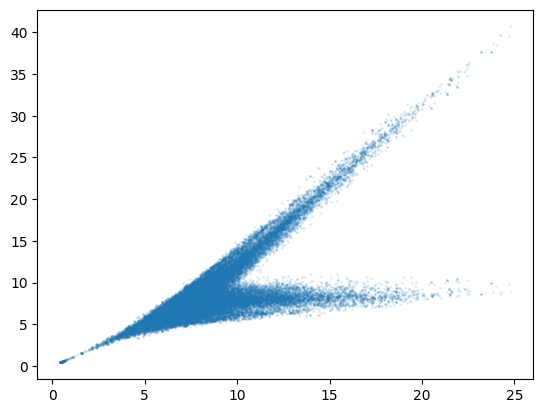

In [67]:
plt.scatter(-np.log(manual_densadapted_sims_sym_morenn.todense().A1),
            -np.log(manual_densadapted_sims_morenn.todense().A1), s=1, alpha=0.1)

<ipython-input-68-e7d0daead1e8>:2: RuntimeWarning: divide by zero encountered in log
  -np.log(manual_densadapted_sims.todense().A1), s=1, alpha=0.1)


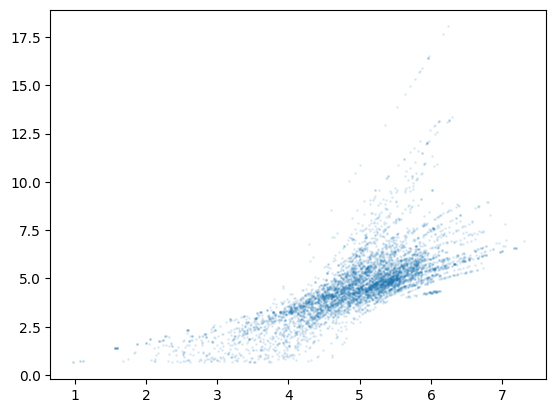

In [68]:
plt.scatter(-np.log(manual_densadapted_sims_morenn.todense().A1),
            -np.log(manual_densadapted_sims.todense().A1), s=1, alpha=0.1)

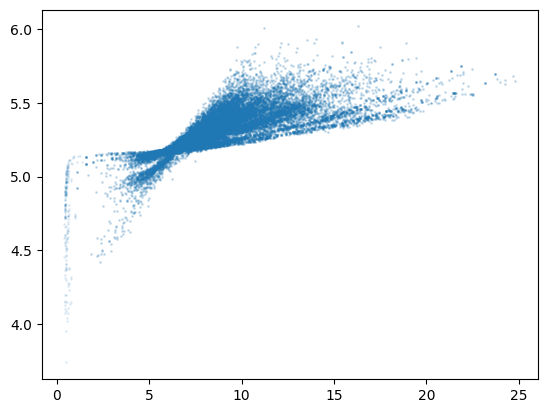

In [72]:
plt.scatter(-np.log(manual_densadapted_sims_sym_morenn.todense().A1),
            -np.log(manual_densadapted_sims_2.todense().A1), s=1, alpha=0.1)

In [27]:
from matplotlib import pyplot as plt
import sklearn.manifold

# do the (two different) aff-to-dist mappings
# get t-sne emebdding, color points by ground-truth motif membership
invlogistic_distmat = modisco.affinitymat.AffToDistViaInvLogistic()(
                        all_pairwise_sims)
invlogistic_embedding = sklearn.manifold.TSNE(
                perplexity=PERPLEXITY,
                init="random",
                metric='precomputed',
                verbose=3, random_state=1234).fit_transform(invlogistic_distmat)

#maxtomin_distmat = modisco.affinitymat.MaxToMin()(all_pairwise_sims)
#maxtomin_embedding = sklearn.manifold.TSNE(
#                perplexity=10,
#                metric='precomputed',
#                verbose=3, random_state=1234).fit_transform(maxtomin_distmat)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.348119
[t-SNE] Computed conditional probabilities in 0.015s
[t-SNE] Iteration 50: error = 62.3115883, gradient norm = 0.3187840 (50 iterations in 1.244s)
[t-SNE] Iteration 100: error = 60.3416519, gradient norm = 0.3866004 (50 iterations in 0.713s)
[t-SNE] Iteration 150: error = 61.1668701, gradient norm = 0.4098483 (50 iterations in 0.169s)
[t-SNE] Iteration 200: error = 62.2206726, gradient norm = 0.3187120 (50 iterations in 0.302s)
[t-SNE] Iteration 250: error = 60.7986183, gradient norm = 0.2897363 (50 iterations in 0.354s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.798618
[t-SNE] Iteration 300: error = 0.8004057, gradient norm = 0.0079800 (50 iterations in 0.138s)
[t-SNE] Iteration 350: error = 0.7273504, gradient norm = 0.0061883 (

Invlogisitc afftodist tsne


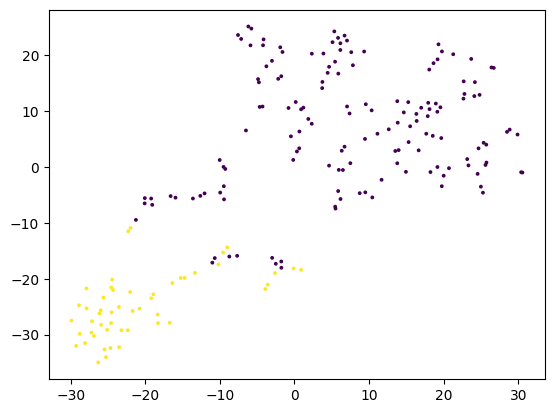

In [28]:
print("Invlogisitc afftodist tsne")
plt.scatter(invlogistic_embedding[:,0], invlogistic_embedding[:,1], s=3,
            c=sub_seqlets_whichpwms)
plt.show()

#print("1.0 minus afftodist tsne")
#plt.scatter(maxtomin_embedding[:,0], maxtomin_embedding[:,1], s=3,
#            c=sub_seqlets_whichpwms)
#plt.show()

In [29]:
#prepare unadapted sims to run leiden on
#sym_seqlet_neighbors, sym_pairwise_sims_nn = modisco.util.symmetrize_nn_distmat(
#    distmat_nn=nn_pairwise_sims, nn=nearest_neighbors,
#    average_with_transpose=True)


In [ ]:
clusterer1 = modisco.cluster.core.LeidenClusterParallel(
                n_jobs=10,
                affmat_transformer=
                    modisco.affinitymat.transformers.SymmetrizeByAddition(
                                                   probability_normalize=True),
                numseedstotry=50,
                n_leiden_iterations=-1,
                verbose=True)

nodensadapted_leidenclusters = clusterer1(
    modisco.util.coo_matrix_from_neighborsformat(
                    entries=nn_pairwise_sims,
                    neighbors=nearest_neighbors,
                    ncols=len(nn_pairwise_sims)).tocsr(),
    initclusters=None)

densadapted_leidenclusters = clusterer1(manual_densadapted_sims,
                                        initclusters=None)

In [39]:
clusterer2 = modisco.cluster.core.LeidenClusterParallel(
      n_jobs=10,
      affmat_transformer=
        modisco.affinitymat.transformers.AdhocAffMatTransformer(lambda x: x),
      numseedstotry=50,
      n_leiden_iterations=-1,
      verbose=True)

densadapted_leidenclusters_2 = clusterer2(manual_densadapted_sims_2,
    initclusters=None)

Beginning preprocessing + Leiden
Affmat shape: 200


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   27.1s


Quality: 0.044218880507281476


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   46.8s finished


In [ ]:
#confirmed: when matrix is symmetric, clusterer1 gives same clustering as
# clusterer2...quality differs only beyond the numerical precision point
#densadapted_leidenclusters_2_alt = clusterer1(manual_densadapted_sims_2,
#    initclusters=None)
#densadapted_leidenclusters_2_alt.cluster_indices - densadapted_leidenclusters_2.cluster_indices

In [49]:
densadapted_leidenclusters_morenn = clusterer1(manual_densadapted_sims_morenn,
                                               initclusters=None)

Beginning preprocessing + Leiden
Affmat shape: 200


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   40.2s


Quality: 0.7109561025260008
Quality: 0.7109563207777713


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:  1.1min finished


In [73]:
densadapted_leidenclusters_sym_morenn = clusterer1(manual_densadapted_sims_sym_morenn,
                                               initclusters=None)

Beginning preprocessing + Leiden
Affmat shape: 200


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   45.4s


Quality: 0.776349525694056
Quality: 0.77639149043958
Quality: 0.7763951783252255


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:  1.1min finished


Ideal


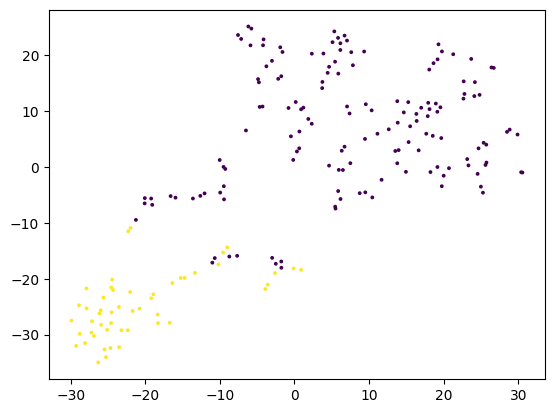

original scikit-based adaptation replicated


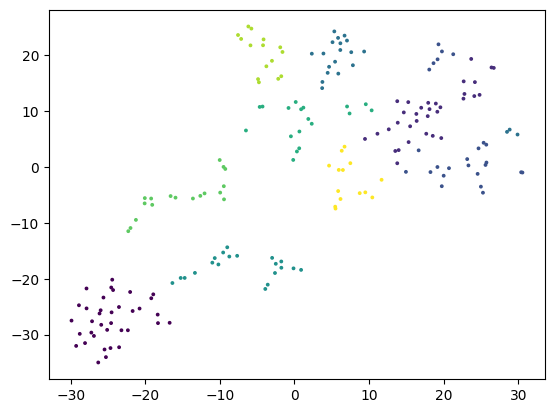

Weird hitscoring adaptation


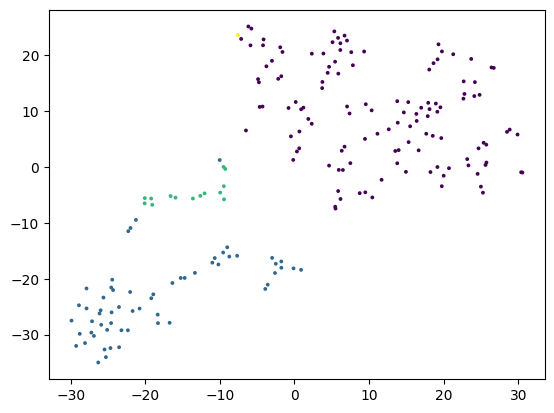

original but with more nearest neighbors


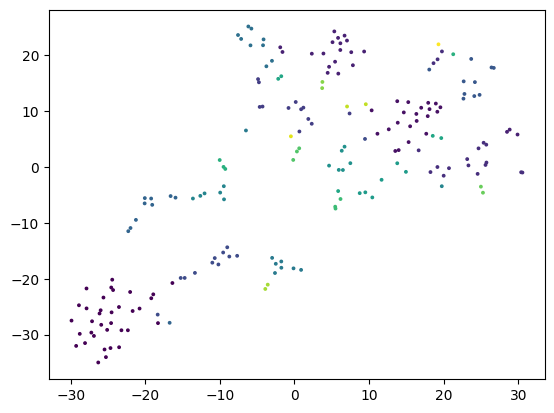

original but with more nearest neighbors and intended symmetrization


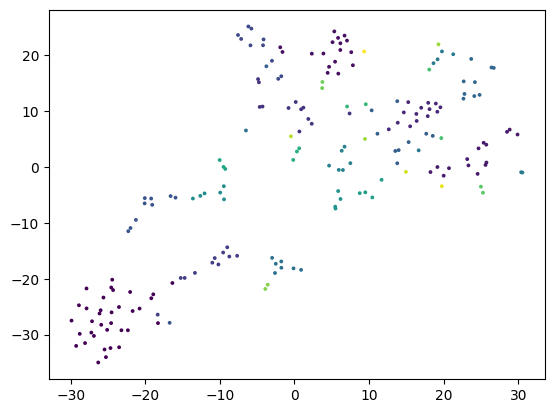

Unadapted


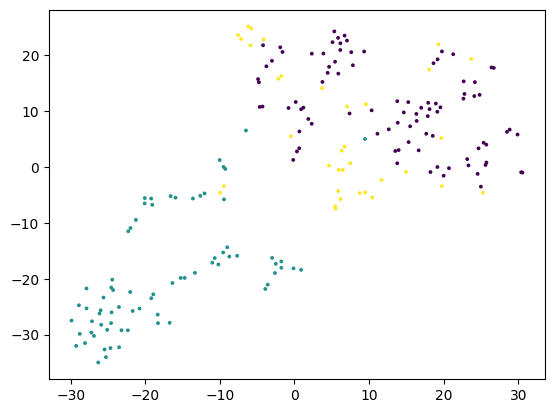

In [80]:
print("Ideal")
plt.scatter(invlogistic_embedding[:,0], invlogistic_embedding[:,1], s=3,
            c=sub_seqlets_whichpwms)
plt.show()

print("original scikit-based adaptation replicated")
plt.scatter(invlogistic_embedding[:,0], invlogistic_embedding[:,1], s=3,
            c=densadapted_leidenclusters.cluster_indices)
plt.show()

print("Weird hitscoring adaptation")
plt.scatter(invlogistic_embedding[:,0], invlogistic_embedding[:,1], s=3,
            c=densadapted_leidenclusters_2.cluster_indices)
plt.show()

print("original but with more nearest neighbors")
plt.scatter(invlogistic_embedding[:,0], invlogistic_embedding[:,1], s=3,
            c=densadapted_leidenclusters_morenn.cluster_indices)
plt.show()

print("original but with more nearest neighbors and intended symmetrization")
plt.scatter(invlogistic_embedding[:,0], invlogistic_embedding[:,1], s=3,
            c=densadapted_leidenclusters_sym_morenn.cluster_indices)
plt.show()

print("Unadapted")
plt.scatter(invlogistic_embedding[:,0], invlogistic_embedding[:,1], s=3,
            c=nodensadapted_leidenclusters.cluster_indices)
plt.show()

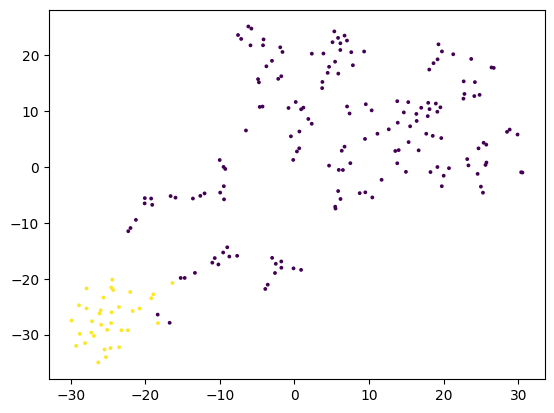

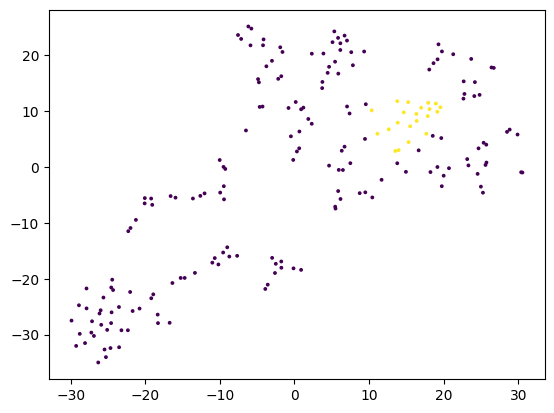

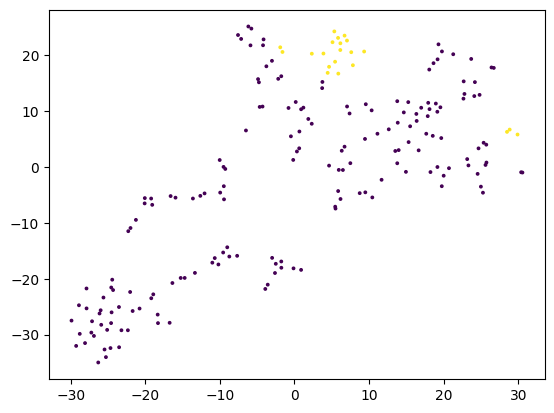

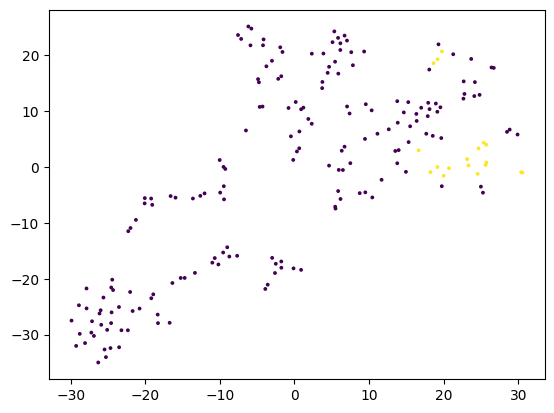

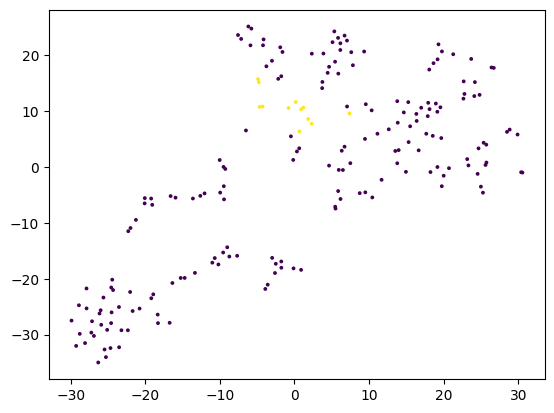

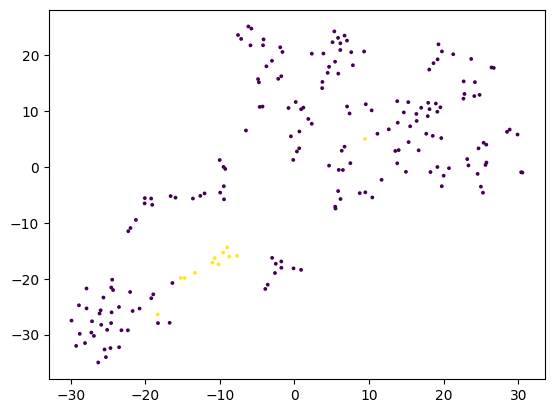

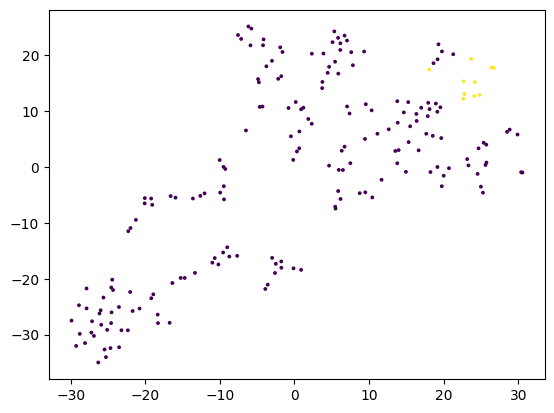

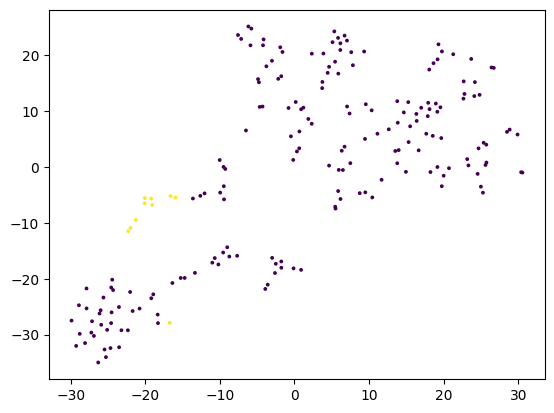

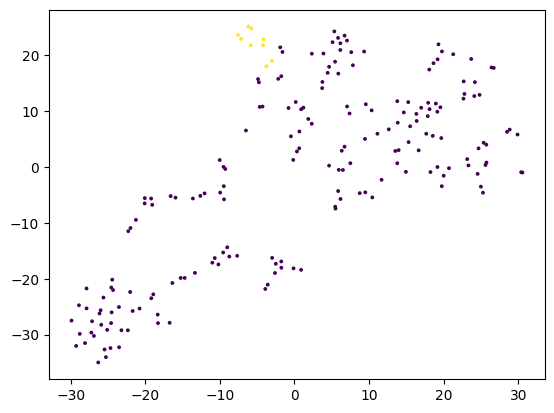

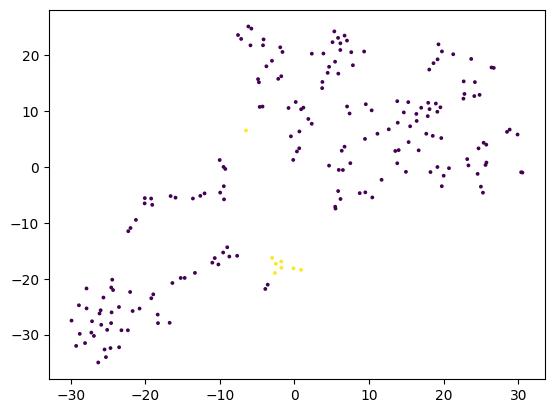

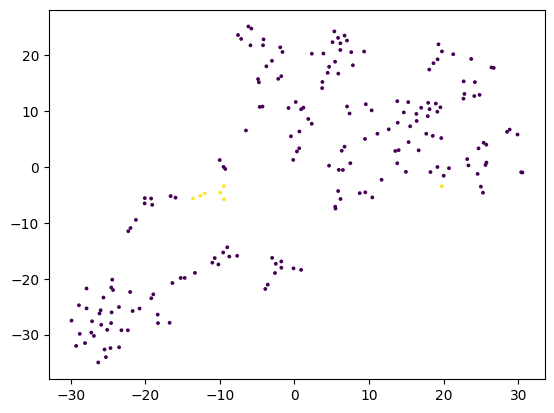

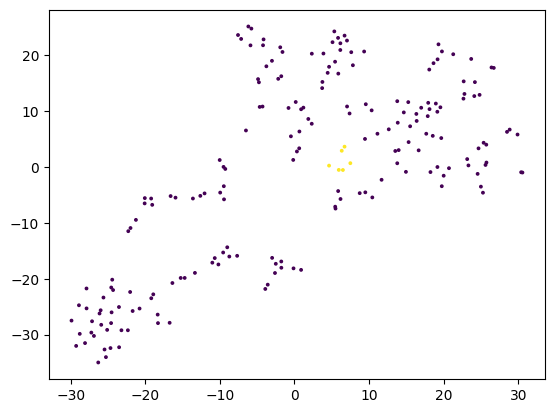

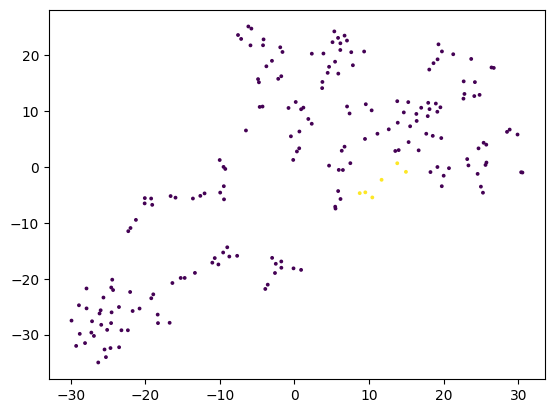

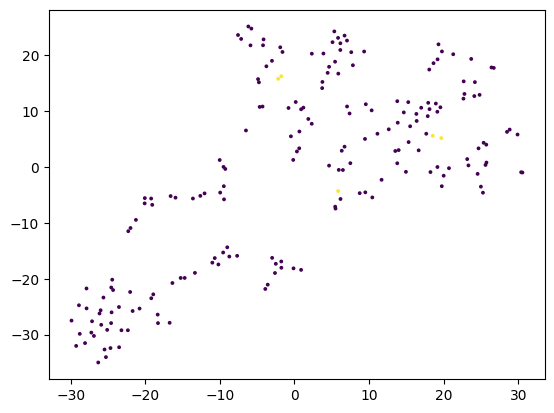

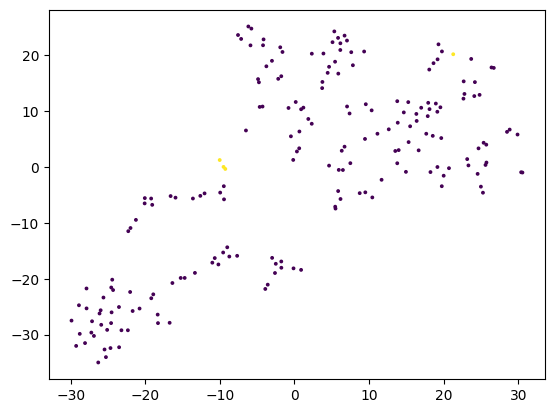

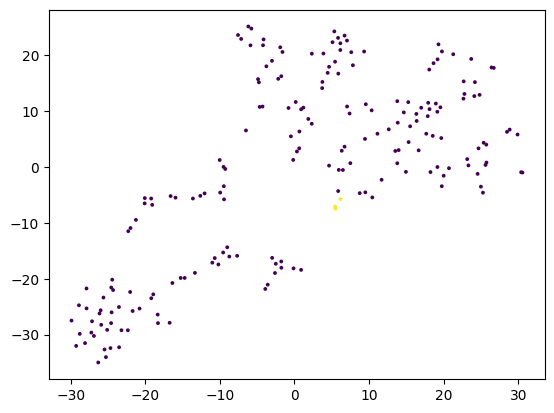

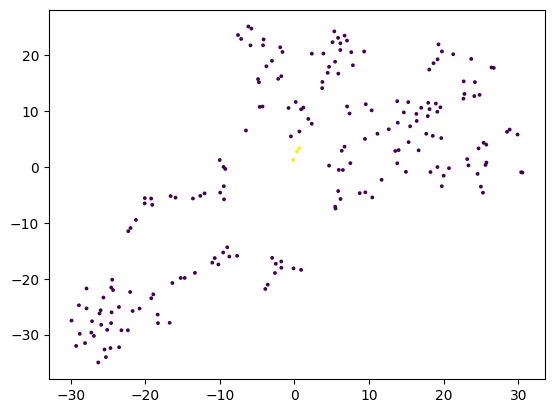

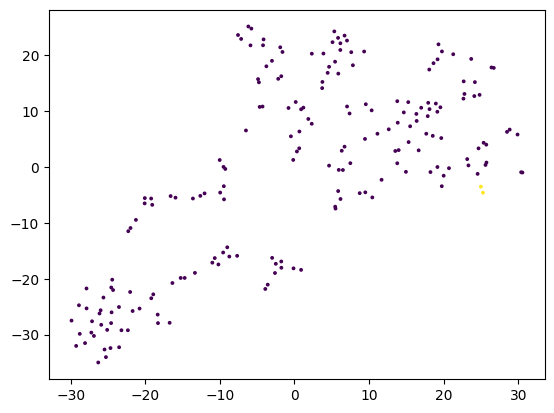

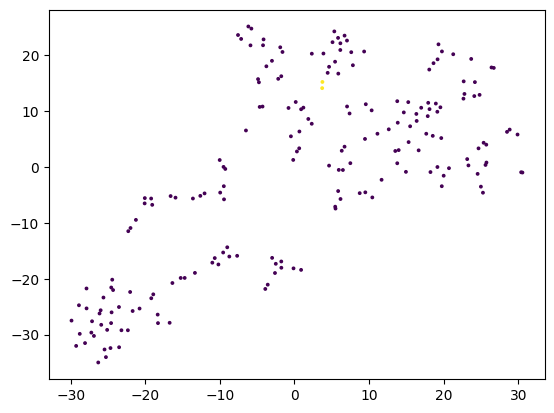

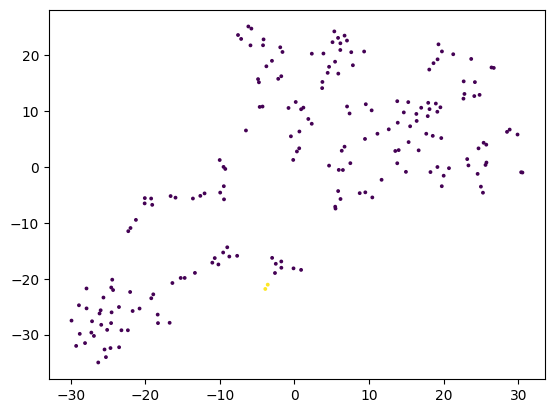

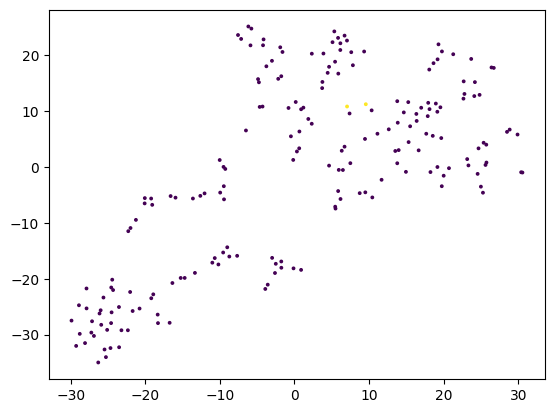

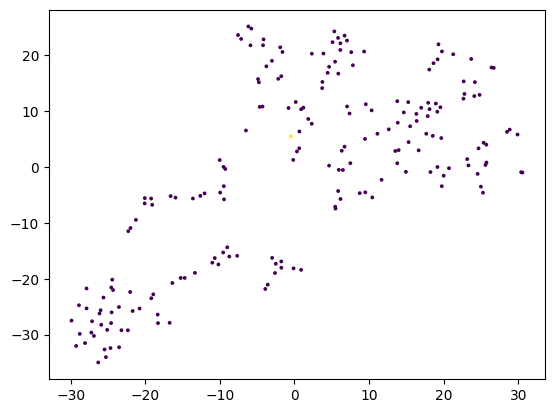

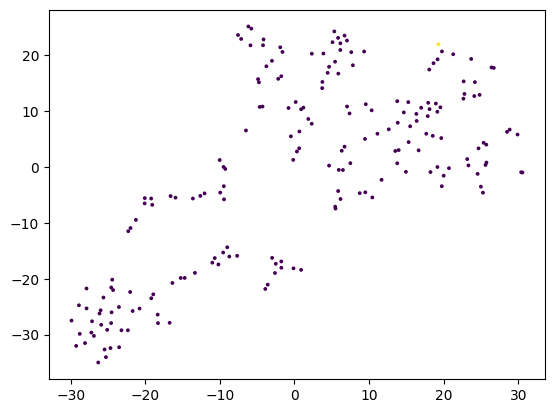

In [77]:
clustering_to_use = densadapted_leidenclusters_morenn
#clustering_to_use = densadapted_leidenclusters_sym_morenn
#clustering_to_use = densadapted_leidenclusters_2

for i in range(max(clustering_to_use.cluster_indices)+1):
  plt.scatter(invlogistic_embedding[:,0], invlogistic_embedding[:,1], s=3,
              c=clustering_to_use.cluster_indices==i)
  plt.show()

In [ ]:
import joblib

def do_density_adaptation(new_rows_distmat_nn, new_rows_nn,
                              new_rows_betas, new_rows_normfactors):
    new_rows_densadapted_affmat_nn = []
    for i in range(len(new_rows_distmat_nn)):
        densadapted_row = []
        for j,distance in zip(new_rows_nn[i], new_rows_distmat_nn[i]):
            densadapted_row.append(0.5*(
              (np.exp(-distance*new_rows_betas[i])/new_rows_normfactors[i])
              +(np.exp(-distance*new_rows_betas[j])/
                new_rows_normfactors[j])))
        new_rows_densadapted_affmat_nn.append(densadapted_row)
    return new_rows_densadapted_affmat_nn




#get density embeddings
nn_invlogistic_distmat = modisco.affinitymat.AffToDistViaInvLogistic()(nn_pairwise_sims)
invlogistic_csr_density_adapted_affmat = get_density_embeddings(
    distmat_nn=nn_invlogistic_distmat, seqlet_neighbors=nearest_neighbors)


Beginning preprocessing + Leiden
Affmat shape: 200


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   27.0s


Quality: 0.7100100238508678
Quality: 0.7100357723379953


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   37.7s finished


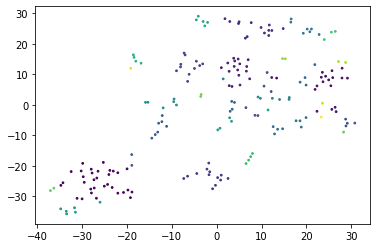

In [ ]:
#run leiden on the adapted sims
densadapted_leidenclusters = clusterer(invlogistic_csr_density_adapted_affmat,
                                       initclusters=None)

plt.scatter(invlogistic_embedding[:,0], invlogistic_embedding[:,1], s=3,
            c=densadapted_leidenclusters.cluster_indices)
plt.show()

In [ ]:
#run leiden on the adapted sims
nn_maxtomin_distmat = modisco.affinitymat.MaxToMin()(nn_pairwise_sims)
maxtomin_csr_density_adapted_affmat = get_density_embeddings(
    distmat_nn=nn_maxtomin_distmat, seqlet_neighbors=nearest_neighbors)

maxtomin_densadapted_leidenclusters = clusterer(maxtomin_csr_density_adapted_affmat,
                                       initclusters=None)



Beginning preprocessing + Leiden
Affmat shape: 200


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.8s


Quality: 0.0038452556350181935
Quality: 0.003847501800831612


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   12.3s finished


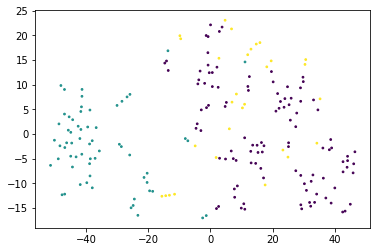

In [ ]:
plt.scatter(invlogistic_embedding[:,0], invlogistic_embedding[:,1], s=3,
            c=maxtomin_densadapted_leidenclusters.cluster_indices)
plt.show()

Install MEME

In [ ]:
!wget http://meme-suite.org/meme-software/5.1.1/meme-5.1.1.tar.gz
!tar zxf meme-5.1.1.tar.gz
%cd meme-5.1.1

#Ghostscript dependency
!apt-get install -y ghostscript-x

#Perl module dependencies
!echo $PERL5LIB
%set_env PERL5LIB=$HOME/perl5/lib/perl5:$PERL5LIB
!echo $PERL5LIB
!curl -L http://cpanmin.us | perl - File::Which
!curl -L http://cpanmin.us | perl - HTML::PullParser
!curl -L http://cpanmin.us | perl - HTML::Template
!curl -L http://cpanmin.us | perl - HTML::TreeBuilder
!curl -L http://cpanmin.us | perl - JSON
!curl -L http://cpanmin.us | perl - XML::Simple
!curl -L http://cpanmin.us | perl - XML::Parser::Expat
!perl scripts/dependencies.pl #as a sanity check, print out missing dependencies

#install MEME
!make clean
!./configure --prefix=/content/meme --with-url=http://alternate.meme-suite.org/ --enable-serial --enable-build-libxml2 --enable-build-libxslt
!make
#meme-chip test fails with python 3 (seems to be a bug):
# https://groups.google.com/forum/#!topic/meme-suite/D3XR7Ws1gec
#thus, won't run the tests
#!make test
!make install

import os
os.environ['PATH'] = "/content/meme/bin:"+os.environ['PATH']
%cd ..

--2021-10-14 04:25:47--  http://meme-suite.org/meme-software/5.1.1/meme-5.1.1.tar.gz
Resolving meme-suite.org (meme-suite.org)... 128.208.8.135
Connecting to meme-suite.org (meme-suite.org)|128.208.8.135|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://meme-suite.org/meme-software/5.1.1/meme-5.1.1.tar.gz [following]
--2021-10-14 04:25:48--  https://meme-suite.org/meme-software/5.1.1/meme-5.1.1.tar.gz
Connecting to meme-suite.org (meme-suite.org)|128.208.8.135|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://meme-suite.org/meme/meme-software/5.1.1/meme-5.1.1.tar.gz [following]
--2021-10-14 04:25:48--  https://meme-suite.org/meme/meme-software/5.1.1/meme-5.1.1.tar.gz
Reusing existing connection to meme-suite.org:443.
HTTP request sent, awaiting response... 200 200
Length: 46199283 (44M) [application/x-gzip]
Saving to: ‘meme-5.1.1.tar.gz’

meme-5.1.1.tar.gz   100%[===================>]  44.06M  28.9MB/s

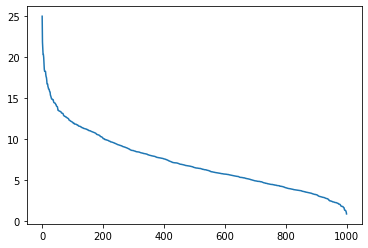

In [ ]:
#Write out sequences to look for differential enrichment
bg1_output = np.sum(bg1_actual_scores, axis=(1,2))
bg1_descending_output_sort = np.argsort(-bg1_output)
plt.plot(bg1_output[bg1_descending_output_sort])
plt.show()
with open("bg1_upperhalf.txt",'w') as f:
  f.write("\n".join([">seq"+str(i)+"\n"+bgdata1.sequences[i] for i in bg1_descending_output_sort[:int(len(bg1_output)/2)]]))
with open("bg1_lowerhalf.txt",'w') as f:
  f.write("\n".join([">seq"+str(i)+"\n"+bgdata1.sequences[i] for i in bg1_descending_output_sort[int(len(bg1_output)/2):]]))

In [ ]:
#launch MEME
!meme bg1_upperhalf.txt -dna -oc . -nostatus -time 14400 -mod anr -nmotifs 3 -minw 4 -maxw 8 -objfun de -neg bg1_lowerhalf.txt -markov_order 0

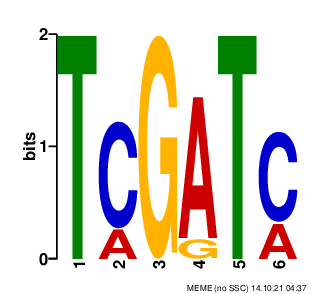

In [ ]:
from IPython.display import Image
Image(filename='logo1.png')


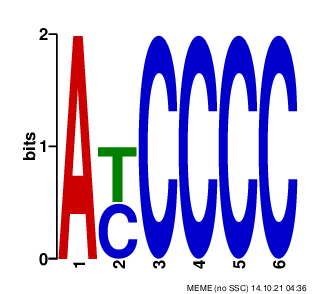

In [ ]:
Image(filename='logo2.png')

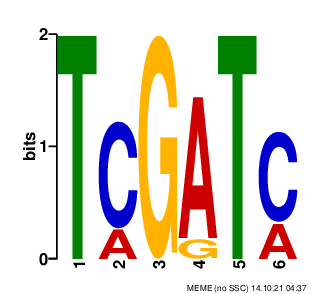

In [ ]:

Image(filename='logo3.png')